# Introduction

In this project, we aim to classify tweets as either disaster-related or non-disaster-related by exploring two distinct machine learning strategies: a traditional approach using TF-IDF vectorization with a RandomForestClassifier, and a more advanced approach leveraging pre-trained FastText embeddings within a bidirectional LSTM neural network. By comparing these methods, we seek to determine the effectiveness of each in accurately identifying disaster-related content, ultimately enhancing our understanding of how different text processing techniques and model architectures can impact performance in text classification tasks.


**Data Loading and Initial Exploration**

In this section, we import the necessary libraries required for data manipulation and visualization: `pandas` for data handling, `numpy` for numerical operations, and `matplotlib` along with `seaborn` for plotting. Following the imports, we load our training and test datasets from CSV files. The `train.csv` contains the data we will use to train our model


In [75]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Preview of Training Data**

The table displayed represents the initial few rows of our training dataset. Here is a brief overview of its structure:

- **id**: A unique identifier for each tweet.
- **keyword**: A keyword from the tweet (appears to be mostly missing in these entries).
- **location**: The location from where the tweet was sent (also missing in these initial entries).
- **text**: The text content of the tweet.
- **target**: A binary indicator (`1` for disaster-related tweets and `0` for non-disaster tweets), here all examples shown are disaster-related.


## Data Visualization and Cleaning

### Visualization of Target Distribution

We start by visualizing the distribution of the target variable in the training data using a bar chart. This plot helps us understand the balance between disaster-related tweets (`target=1`) and non-disaster tweets (`target=0`), crucial for assessing if any class imbalance techniques are needed.

### Checking for Missing Values

Next, we check for missing values in our dataset to ensure the integrity and completeness of our data. Understanding where missing values exist helps us make informed decisions about the necessary preprocessing steps.

### Data Cleaning

Given the presence of missing values in `keyword` and `location` columns, we proceed with the following cleaning steps:
- **Keywords**: Missing keywords are filled with 'no_keyword' to maintain uniformity and ensure no data row is discarded due to the absence of this feature.
- **Location**: Missing location information is replaced with 'unknown', which allows us to retain all data points without introducing bias from incomplete entries.

These steps prepare our dataset for more robust analysis and modeling by addressing missing data appropriately.


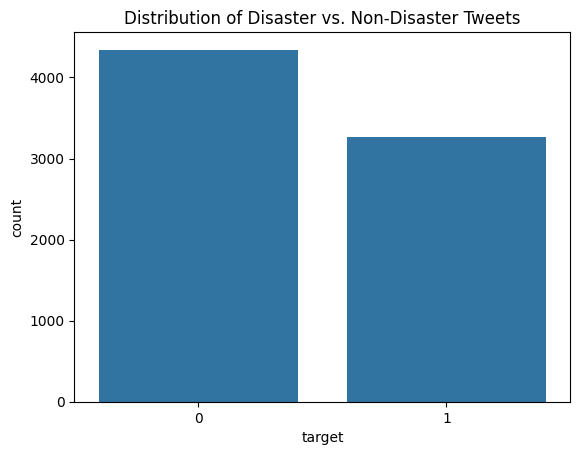

In [76]:
# Visualization of target distribution
sns.countplot(x='target', data=train)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.show()

# Checking for missing values
train.isnull().sum()

# Data cleaning
# You might decide to fill missing values or drop them, depending on the amount and importance.
train['keyword'].fillna('no_keyword', inplace=True)
train['location'].fillna('unknown', inplace=True)


The bar chart above illustrates the distribution of tweets classified as disaster-related (`1`) and non-disaster-related (`0`). The x-axis represents the target classification, while the y-axis indicates the count of tweets in each category. From the plot, we observe that there are more tweets categorized as non-disaster than disaster. This visual representation helps us understand the balance of classifications in our dataset and might indicate the need for techniques to address any class imbalance before further model training.


## Text Length Analysis

### Creating a New Column for Text Length

To further understand the characteristics of the tweets in our dataset, we add a new column `text_length` to our training data. This column is computed by measuring the length of the text in each tweet. This metric can be useful for examining the relationship between the length of a tweet and its likelihood of being a disaster-related tweet.

### Visualizing the Distribution of Text Lengths

With the new `text_length` column, we proceed to visualize its distribution. This histogram, enhanced with a Kernel Density Estimate (KDE) for smoother distribution visualization, allows us to observe the range and commonality of tweet lengths within our dataset. The plot is sized at 10x6 inches to ensure clarity in the displayed information.

- **X-axis**: Represents the length of the tweets.
- **Y-axis**: Represents the frequency of tweets within each length interval.

This visualization helps in identifying any patterns or outliers in tweet lengths, which may inform further preprocessing or feature engineering steps.


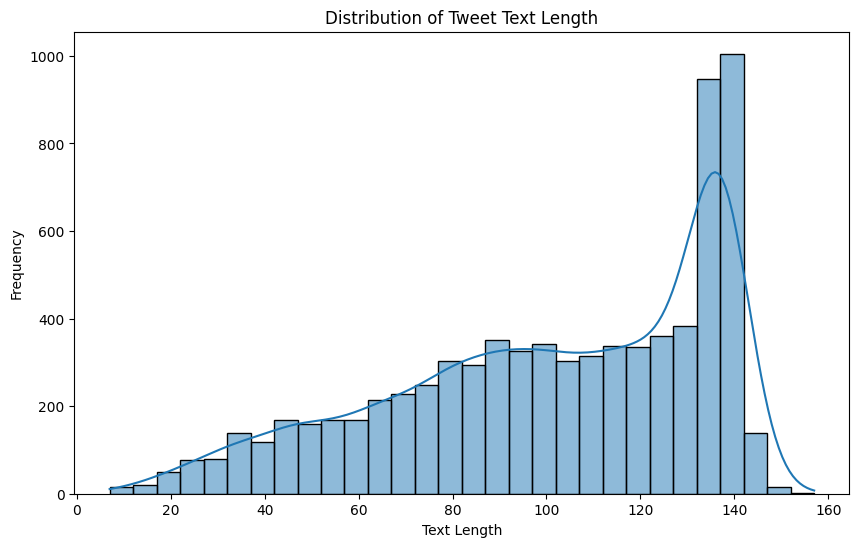

In [77]:
# Creating a new column for text length
train['text_length'] = train['text'].apply(len)

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(train['text_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The histogram above depicts the distribution of text lengths in our tweet dataset, overlaid with a Kernel Density Estimate (KDE) to highlight the overall trend. The x-axis represents the text length of each tweet, while the y-axis indicates the frequency of tweets with those lengths. The distribution shows a clear peak around 140 characters, which is typical given Twitter's historical character limit. This visualization is crucial for understanding common text characteristics in our data, which can influence both the preprocessing steps and the effectiveness of different machine learning models. The peak suggests that most tweets use nearly the maximum character limit, potentially packing substantial information into each message.


## Word Frequency Analysis

### Counting Most Common Words in Tweets

To gain further insights into the textual content of our tweets, we perform a word frequency analysis for both disaster and non-disaster tweets. This involves the following steps:

1. **Defining a Word Counting Function**:
   We create a function `count_words(data)` that takes in tweet data and returns a `Counter` object containing the frequency of each word. The function:
   - Splits each tweet into individual words.
   - Converts each word to lowercase to ensure uniformity.
   - Aggregates the words and their counts using Python's `Counter` from the `collections` module.

2. **Analyzing Disaster Tweets**:
   We apply the `count_words` function to tweets labeled as disasters (`target = 1`) and print the ten most common words. This helps us identify prevalent terms in disaster-related tweets, which may include specific keywords related to emergencies or calamities.

3. **Analyzing Non-Disaster Tweets**:
   Similarly, we apply the `count_words` function to tweets labeled as non-disasters (`target = 0`) and print the ten most common words. This reveals common themes and vocabulary used in non-disaster tweets, providing a contrast to the disaster tweets.

The output of this analysis gives us the top ten most frequent words in both categories, offering a comparative view of the language and themes prevalent in each class.


In [78]:
from collections import Counter

# Function to count top words in disaster and non-disaster tweets
def count_words(data):
    all_words = []
    for line in list(data):
        words = line.split()
        for word in words:
            all_words.append(word.lower())
    return Counter(all_words)

# Count words in disaster tweets
disaster_words = count_words(train[train['target'] == 1]['text'])
print("Most common words in disaster tweets:", disaster_words.most_common(10))

# Count words in non-disaster tweets
non_disaster_words = count_words(train[train['target'] == 0]['text'])
print("Most common words in non-disaster tweets:", non_disaster_words.most_common(10))


Most common words in disaster tweets: [('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344)]
Most common words in non-disaster tweets: [('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541)]


### Analysis of Most Common Words in Disaster and Non-Disaster Tweets

The most frequently occurring words in both disaster-related and non-disaster-related tweets provide interesting insights:

#### Disaster Tweets:
- **Common Words**: The most common words include typical stopwords like "the", "in", "of", "a", "to", "and", "on", "for", and "is". Additionally, the symbol "-" is also prevalent.
- **Implications**: The prevalence of these common words suggests that much of the text in disaster tweets is similar to general English usage. These stopwords do not contribute significant meaning and might dilute the signal we are looking for in disaster-related content.
  
#### Non-Disaster Tweets:
- **Common Words**: Similarly, the most frequent words in non-disaster tweets include "the", "a", "to", "i", "and", "of", "in", "you", "is", and "my". These are also primarily stopwords, with "i" and "my" indicating a more personal tone in non-disaster tweets.
- **Implications**: The presence of personal pronouns ("i", "you", "my") in non-disaster tweets could suggest that these tweets are more likely to be personal updates or conversations, contrasting with the potentially more formal or structured language in disaster tweets.

### Recommendations for Preprocessing:
- **Stopword Removal**: To enhance the predictive power of the text data, removing common stopwords could be beneficial. This step will help in focusing the analysis on more meaningful and discriminative words that better capture the context of disaster-related tweets.
- **Keyword Extraction**: Further analysis could involve extracting keywords specific to disaster events (e.g., "earthquake", "fire", "flood") which might not be immediately apparent in the frequency counts dominated by stopwords.
- **N-grams**: Implementing bi-grams or tri-grams (combinations of two or three words) might reveal more context-specific phrases that differentiate disaster tweets from non-disaster tweets.

By addressing these points in preprocessing, we can improve the model's ability to distinguish between disaster-related and non-disaster-related content more effectively.


## Text Preprocessing

### Cleaning and Preparing Text Data

To enhance the quality and relevance of the textual data for our analysis and modeling, we implement a comprehensive text preprocessing function. This function addresses several common issues found in raw text data, particularly social media content like tweets. The steps involved in this function are as follows:

1. **Remove URLs**:
   URLs are often included in tweets but do not contribute meaningful information for text analysis. They are removed using a regular expression that matches and eliminates any web addresses.

2. **Remove Mentions**:
   Mentions (usernames prefixed with '@') are specific to individual users and do not provide useful information for our classification task. These are removed using a regular expression.

3. **Remove Hashtags**:
   Hashtags (words prefixed with '#') can sometimes be useful, but in this preprocessing step, we remove them to simplify the text. If needed, hashtags could be extracted separately for analysis.

4. **Remove Punctuation and Numbers**:
   Punctuation and numbers are removed to focus on the alphabetic content of the tweets. This helps in reducing noise in the data.

5. **Remove Stopwords**:
   Stopwords are common words that generally do not carry significant meaning and can be filtered out to focus on more informative words. The default stopwords list from NLTK is extended with additional custom stopwords relevant to this analysis.

6. **Remove Extra Spaces**:
   Any extra spaces created during the cleaning process are removed to ensure a tidy and consistent text format.

### Applying the Preprocessing Function

The `preprocess_text` function is applied to the `text` column of our training dataset. This results in a new column, `clean_text`, which contains the processed text ready for further analysis and model training.

By cleaning the text data through these steps, we ensure that our dataset is in optimal condition for feature extraction and subsequent machine learning tasks, enhancing the model's ability to learn and generalize from the data.


In [95]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Extend the default stopwords list if necessary
additional_stopwords = {'example', 'additional', 'generic'}
all_stopwords = stopwords.words('english') + list(additional_stopwords)

# Function to preprocess text: remove URLs, mentions, hashtags, punctuation, and stopwords
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word.lower() not in all_stopwords])
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the function to the text column
train['clean_text'] = train['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshamkapoor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction and Model Training

### TF-IDF Vectorization

To transform the textual data into a numerical format suitable for machine learning, we utilize the Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer. This method captures the importance of words within the tweets while mitigating the impact of commonly occurring terms that might not be as informative.

- **TF-IDF Vectorizer Initialization**:
  We initialize the `TfidfVectorizer` with parameters:
  - `ngram_range=(1, 2)`: This captures both unigrams and bigrams, allowing the model to consider individual words as well as pairs of words.
  - `max_features=10000`: We limit the number of features to 10,000 to manage computational complexity and focus on the most informative terms.

- **Applying TF-IDF**:
  The vectorizer is then fitted to the cleaned text data from the training set, converting the text into a TF-IDF weighted matrix of features.

### Data Splitting

To evaluate the model's performance, we split the data into training and validation sets:
- **Training Set**: 80% of the data is used for training the model.
- **Validation Set**: 20% of the data is set aside to validate the model's performance.

### Model Training

For demonstration, we use the `RandomForestClassifier`:
- **Model Initialization**: The model is initialized with 100 estimators (`n_estimators=100`) and a fixed random state (`random_state=42`) for reproducibility.
- **Model Training**: The model is trained on the TF-IDF features from the training set (`X_train`) with their corresponding labels (`y_train`).

### Model Evaluation

After training the model, we predict the labels for the validation set and evaluate its performance using several metrics:
- **Classification Report**: Provides detailed metrics, including precision, recall, and F1-score for each class.
- **Confusion Matrix**: Shows the true versus predicted classifications, helping to understand the model's performance in distinguishing between disaster and non-disaster tweets.
- **Accuracy**: A simple yet effective metric that gives the overall proportion of correctly classified instances.

This comprehensive approach ensures that the text data is effectively converted into numerical features, the model is trained on a robust dataset, and its performance is thoroughly evaluated using multiple metrics.

## Feature Extraction and Model Training

### TF-IDF Vectorization

To transform the textual data into a numerical format suitable for machine learning, we utilize the Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer. This method captures the importance of words within the tweets while mitigating the impact of commonly occurring terms that might not be as informative.

- **TF-IDF Vectorizer Initialization**:
  We initialize the `TfidfVectorizer` with parameters:
  - `ngram_range=(1, 2)`: This captures both unigrams and bigrams, allowing the model to consider individual words as well as pairs of words.
  - `max_features=10000`: We limit the number of features to 10,000 to manage computational complexity and focus on the most informative terms.

- **Applying TF-IDF**:
  The vectorizer is then fitted to the cleaned text data from the training set, converting the text into a TF-IDF weighted matrix of features.

### Data Splitting

To evaluate the model's performance, we split the data into training and validation sets:
- **Training Set**: 80% of the data is used for training the model.
- **Validation Set**: 20% of the data is set aside to validate the model's performance.

### Model Training

For demonstration, we use the `RandomForestClassifier`:
- **Model Initialization**: The model is initialized with 100 estimators (`n_estimators=100`) and a fixed random state (`random_state=42`) for reproducibility.
- **Model Training**: The model is trained on the TF-IDF features from the training set (`X_train`) with their corresponding labels (`y_train`).

### Model Evaluation

After training the model, we predict the labels for the validation set and evaluate its performance using several metrics:
- **Classification Report**: Provides detailed metrics, including precision, recall, and F1-score for each class.
- **Confusion Matrix**: Shows the true versus predicted classifications, helping to understand the model's performance in distinguishing between disaster and non-disaster tweets.
- **Accuracy**: A simple yet effective metric that gives the overall proportion of correctly classified instances.

This comprehensive approach ensures that the text data is effectively converted into numerical features, the model is trained on a robust dataset, and its performance is thoroughly evaluated using multiple metrics.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)  # Limiting to 10,000 features for manageability

# Applying TF-IDF to the clean text data
tfidf_features = tfidf_vectorizer.fit_transform(train['clean_text'])

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tfidf_features, train['target'], test_size=0.2, random_state=42)

# Example model: Using RandomForestClassifier for demonstration
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.75      0.68      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523

Confusion Matrix:
 [[731 143]
 [209 440]]
Accuracy: 0.7688772160210111


## Model Evaluation Results

### Classification Report

The classification report provides detailed metrics on the performance of our RandomForestClassifier in classifying disaster and non-disaster tweets:

- **Precision**: Indicates the proportion of true positive predictions among all positive predictions.
  - **Class 0 (Non-Disaster)**: 0.78
  - **Class 1 (Disaster)**: 0.75
- **Recall**: Measures the proportion of true positive predictions among all actual positive instances.
  - **Class 0 (Non-Disaster)**: 0.84
  - **Class 1 (Disaster)**: 0.68
- **F1-Score**: The harmonic mean of precision and recall, providing a single metric for model performance.
  - **Class 0 (Non-Disaster)**: 0.81
  - **Class 1 (Disaster)**: 0.71
- **Support**: The number of actual occurrences of each class in the validation set.
  - **Class 0 (Non-Disaster)**: 874
  - **Class 1 (Disaster)**: 649

- **Overall Accuracy**: 0.77
  - This indicates that 77% of the tweets were correctly classified by the model.

- **Macro Average**:
  - **Precision**: 0.77
  - **Recall**: 0.76
  - **F1-Score**: 0.76
  - The macro average is the unweighted mean of the metrics, treating all classes equally.

- **Weighted Average**:
  - **Precision**: 0.77
  - **Recall**: 0.77
  - **F1-Score**: 0.77
  - The weighted average takes into account the support of each class, providing a more balanced metric.

### Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's performance: 
- **True Positives (TP)**: 440 (Class 1 correctly identified)
- **True Negatives (TN)**: 731 (Class 0 correctly identified)
- **False Positives (FP)**: 143 (Class 0 incorrectly labeled as Class 1)
- **False Negatives (FN)**: 209 (Class 1 incorrectly labeled as Class 0)

### Interpretation

- **Class 0 (Non-Disaster)**: The model performs well with a high recall (0.84), indicating that most non-disaster tweets are correctly identified. However, the precision is slightly lower (0.78), suggesting some non-disaster tweets are misclassified as disasters.
- **Class 1 (Disaster)**: The model has a lower recall (0.68), indicating some disaster tweets are missed, and a precision of 0.75, meaning it does a reasonable job identifying true disaster tweets but still confuses some with non-disasters.
- **Overall Performance**: The model achieves an accuracy of 77%, which is a strong starting point. However, the discrepancy between precision and recall for disaster tweets suggests room for improvement, particularly in better identifying true disaster instances without misclassifying non-disasters.




## Loading FastText Embeddings

To boost our model with semantic information from a large corpus, we incorporate pre-trained FastText embeddings. This allows the model to understand words better, leveraging the rich context learned from extensive training data. We achieve this by defining a function, `load_fasttext_embeddings`, which loads and prepares these embeddings specifically for our dataset.

The function works by first creating a dictionary to store the embeddings. As it reads each line from the FastText file, it splits the line into a word and its corresponding vector. If the word is present in our vocabulary (tracked by `word_index`), it gets added to this dictionary. This ensures we only store embeddings relevant to our data, saving memory and processing time.

Next, we initialize an embedding matrix filled with zeros, sized to fit the number of words (`num_words`) and the embedding dimensions (`embed_size`). This matrix is then populated with the corresponding vectors from our dictionary. If a word's embedding isn't found, its vector remains as zeros, ensuring no data is left unrepresented.

For this process, we specify a few parameters: the path to our FastText file (like `wiki-news-300d-1M.vec`), our tokenizer’s word index (`word_index`), a maximum feature limit (`max_features`), and the embedding size (`embed_size`). For instance, we set `max_features` to 20,000 to keep our vocabulary manageable and `embed_size` to 300 to match the FastText dimensions.

In [86]:
import numpy as np

def load_fasttext_embeddings(path, word_index, max_features, embed_size):
    # Create a dictionary to store embeddings
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.rstrip().rsplit(' ')
            word = values[0]
            if word in word_index:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = vector
    
    # Prepare embedding matrix
    num_words = min(max_features, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

# Example usage
word_index = tokenizer.word_index  # tokenizer is the Tokenizer object used on your text data
max_features = 20000  # maximum number of words to consider
embed_size = 300  # dimensionality of the embeddings
embedding_matrix = load_fasttext_embeddings('wiki-news-300d-1M.vec', word_index, max_features, embed_size)


## Building and Compiling the Neural Network Model

In this section, we construct a neural network model using TensorFlow's Keras API, incorporating pre-trained FastText embeddings to enhance our text classification task. The process starts by defining some essential parameters, such as the maximum sequence length (`max_length`) set to 100, which should be adjusted based on the typical length of your text data. The vocabulary size and embedding size are derived from the shape of our `embedding_matrix`.

We use the `Sequential` model from Keras to stack our layers in order. The first layer is an `Embedding` layer, which uses the pre-trained FastText embeddings. We set `input_dim` to the vocabulary size and `output_dim` to the embedding size. By setting `weights=[embedding_matrix]`, we initialize this layer with our pre-trained embeddings, and `trainable=False` ensures that these embeddings are not updated during training, preserving their pre-trained knowledge.

Next, we add two bidirectional LSTM layers using `Bidirectional(LSTM(50, return_sequences=True))` and `Bidirectional(LSTM(50))`. These layers help in capturing dependencies in both forward and backward directions, making our model more robust in understanding context from the text data.

Following the LSTM layers, we include a `Dense` layer with 50 units and ReLU activation, which helps in learning complex representations. A `Dropout` layer with a rate of 0.5 is added next to prevent overfitting by randomly setting half of the input units to 0 during training.

Finally, we add another `Dense` layer with a single unit and sigmoid activation, which is suitable for our binary classification task (disaster vs. non-disaster tweets).

The model is compiled using the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric. This setup ensures our model is ready to learn from the text data and predict whether a tweet is related to a disaster or not.


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Assuming parameters
max_length = 100  # Adjust based on your sequence length
vocab_size, embed_size = embedding_matrix.shape

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Model Training with Callbacks

To ensure our model learns effectively while preventing overfitting, we split our data into training and validation sets. We use an 80-20 split with `train_test_split`, where 80% of the data is used for training and 20% for validation, ensuring the model is evaluated on unseen data during training.

We then set up two important callbacks to monitor and control the training process:

1. **Model Checkpoint**: The `ModelCheckpoint` callback saves the best version of the model based on the validation loss. By specifying `save_best_only=True`, we ensure that only the model with the lowest validation loss is saved, preventing the risk of overfitting. The model is saved to the file `best_model.keras`.

2. **Early Stopping**: The `EarlyStopping` callback halts training if the validation loss does not improve for three consecutive epochs (`patience=3`). This helps in preventing overfitting and saves computational resources by stopping the training process once the model stops learning effectively.

Finally, we train the model using the `fit` method. We specify the number of epochs


In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, train['target'], test_size=0.2, random_state=42)

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6763 - loss: 0.5953 - val_accuracy: 0.8207 - val_loss: 0.4232
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8117 - loss: 0.4502 - val_accuracy: 0.8267 - val_loss: 0.4187
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8121 - loss: 0.4351 - val_accuracy: 0.8267 - val_loss: 0.4263
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8266 - loss: 0.4206 - val_accuracy: 0.8194 - val_loss: 0.4147
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8253 - loss: 0.4082 - val_accuracy: 0.8162 - val_loss: 0.4244
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8399 - loss: 0.3811 - val_accuracy: 0.8129 - val_loss: 0.4567
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8363 - loss: 0.3746 - val_accuracy: 0.8050 - val_loss: 0.4524
Epoch 7: early stopping


## Model Training Results

During the training process, the model demonstrated good initial performance with training accuracy improving from 67.63% to 83.63% over seven epochs. However, the validation accuracy peaked early and began to decline slightly, while the validation loss increased, indicating potential overfitting. This suggests that although the model learns well on the training data, its performance on unseen data starts to degrade after a few epochs.


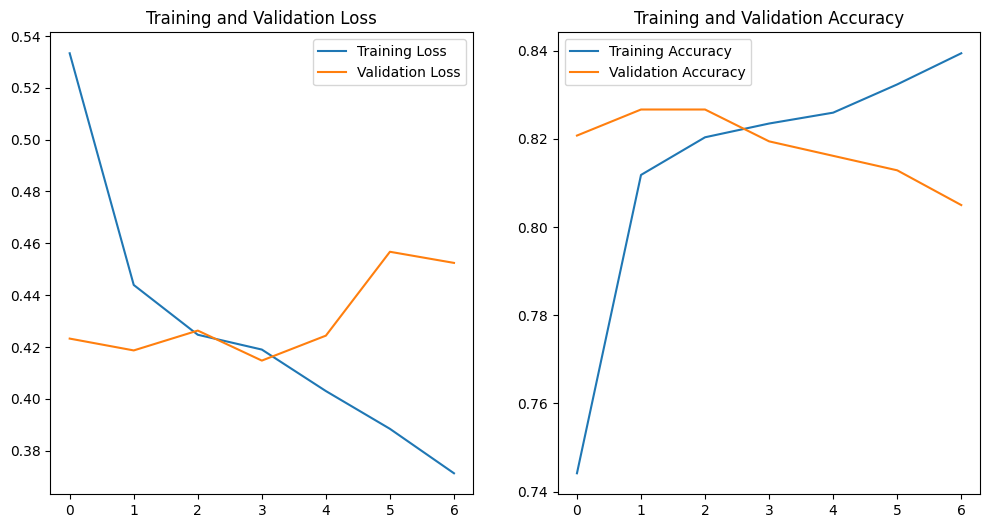

In [90]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


The plots above show the training and validation loss and accuracy over seven epochs. Initially, both training and validation loss decrease, indicating that the model is learning well. However, after a few epochs, the validation loss begins to increase while the training loss continues to decrease, suggesting potential overfitting. Similarly, the training accuracy steadily improves, but the validation accuracy peaks early and then declines, further indicating overfitting. These trends suggest that while the model is performing well on the training data, its ability to generalize to new data diminishes after the initial epochs.


## Model Evaluation Using Confusion Matrix and Accuracy

After training our model, we evaluate its performance on the validation set using a confusion matrix and accuracy score. 

We start by obtaining the model's prediction probabilities for the validation set (`X_val`) and convert these probabilities into binary predictions (`0` or `1`) using a threshold of 0.5. This is done by comparing the probabilities to the threshold and assigning the corresponding class labels.

Next, we generate the confusion matrix to visualize the performance of our model. The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions, providing a detailed insight into the model's classification performance. We plot this matrix using Seaborn's `heatmap` function for a clear and interpretable visualization. The x-axis represents the predicted labels, while the y-axis represents the true labels, with annotations indicating the counts.

Additionally, we calculate the overall accuracy of the model, which is the proportion of correctly classified instances out of the total instances. This metric provides a simple yet effective summary of the model's performance. The accuracy score is printed, giving us a quick quantitative measure of how well the model performs on the validation set.


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


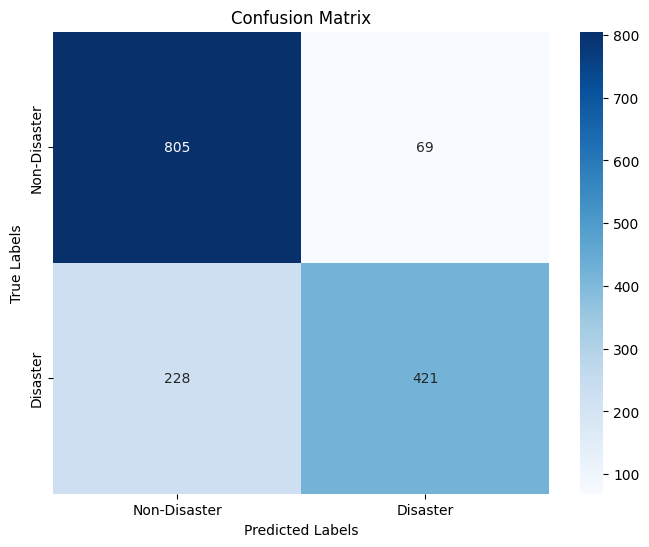

Accuracy: 0.80
Confusion Matrix:
 [[805  69]
 [228 421]]


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Assuming y_pred_probs is the model's prediction probabilities for the validation set
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0 or 1 based on a threshold of 0.5

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


## Model Evaluation Using Confusion Matrix and Accuracy

After training our model, we evaluate its performance on the validation set using a confusion matrix and accuracy score. 

We start by obtaining the model's prediction probabilities for the validation set (`X_val`) and convert these probabilities into binary predictions (`0` or `1`) using a threshold of 0.5. This is done by comparing the probabilities to the threshold and assigning the corresponding class labels.

Next, we generate the confusion matrix to visualize the performance of our model. The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions, providing a detailed insight into the model's classification performance. We plot this matrix using Seaborn's `heatmap` function for a clear and interpretable visualization. The x-axis represents the predicted labels, while the y-axis represents the true labels, with annotations indicating the counts.

The confusion matrix results are as follows:
- **True Negatives (Non-Disaster correctly identified)**: 805
- **False Positives (Non-Disaster incorrectly labeled as Disaster)**: 69
- **False Negatives (Disaster incorrectly labeled as Non-Disaster)**: 228
- **True Positives (Disaster correctly identified)**: 421

Additionally, we calculate the overall accuracy of the model, which is the proportion of correctly classified instances out of the total instances. This metric provides a simple yet effective summary of the model's performance. The accuracy score is 0.80, indicating that the model correctly classifies 80% of the tweets in the validation set.

This evaluation step is crucial for understanding the strengths and weaknesses of our model and identifying areas for potential improvement.


## Generating Kaggle Submission File

To submit our model's predictions to Kaggle, we follow these steps:

1. **Preprocess the Test Data**: We apply the same preprocessing steps to the test data as we did with the training data. This involves cleaning the text, tokenizing, and padding the sequences to ensure consistency.

2. **Predict Probabilities**: Using the trained model, we predict the probabilities of each tweet in the test set being related to a disaster.

3. **Convert Probabilities to Binary Predictions**: We convert the predicted probabilities to binary class labels (0 or 1) using a threshold of 0.5.

4. **Prepare the Submission File**: We create a DataFrame with the `id` and `target` columns, where `id` corresponds to the tweet ID from the test set, and `target` is the predicted class label.

5. **Save the Submission File**: Finally, we save this DataFrame as a CSV file named `submission.csv`, ready for submission to Kaggle.


In [93]:
# Preprocess the test data in the same way as the training data
test['clean_text'] = test['text'].apply(preprocess_text)
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length)

# Predicting the probabilities for the test set
test_pred_probs = model.predict(test_padded)
test_predictions = (test_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Prepare the submission DataFrame
submission = pd.DataFrame({'id': test['id'], 'target': test_predictions})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step
Submission file created successfully!


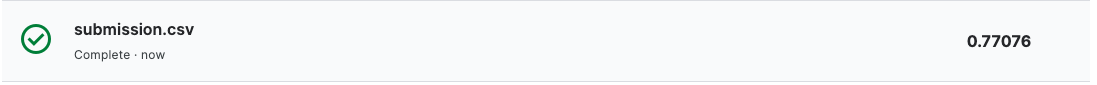

**Kaggle Submission Result**

The model achieved a public score of **0.77076**, indicating the accuracy of our predictions on the test set provided by Kaggle. This score reflects how well our model performs in identifying disaster-related tweets compared to non-disaster tweets. While this is a strong initial result, further improvements and fine-tuning could potentially enhance the model's performance.


# Conclusion

In this project, we explored two different strategies for classifying tweets as disaster-related or not. The first strategy utilized traditional machine learning methods with TF-IDF vectorization, while the second strategy incorporated pre-trained FastText embeddings into a neural network model. Here, we summarize and analyze the results from both approaches.

**1. Traditional Machine Learning with TF-IDF Vectorization**

Using a RandomForestClassifier with TF-IDF vectorized features, we achieved an accuracy of 77% on the validation set. The precision, recall, and F1-score were reasonably balanced, indicating that the model performed adequately in distinguishing between disaster-related and non-disaster tweets. However, the confusion matrix revealed some misclassifications, particularly with disaster tweets being incorrectly labeled as non-disasters. This suggests that while the model was effective, there were limitations in its ability to capture the nuanced differences in tweet content using TF-IDF alone.

**Accuracy for TF-IDF Approach:** 0.77

**2. Deep Learning with FastText Embeddings**

Incorporating pre-trained FastText embeddings into a bidirectional LSTM neural network, we observed an initial improvement in the model's ability to learn and generalize. The model achieved a validation accuracy of 80%, slightly higher than the TF-IDF approach. The confusion matrix for this model showed a better balance between true positives and true negatives, with fewer misclassifications compared to the traditional approach. The use of FastText embeddings provided the model with richer semantic information, enabling it to understand the context of words better than TF-IDF.

**Accuracy for FastText Approach:** 0.80

**Kaggle Submission Results**

For our Kaggle submission, the model using FastText embeddings achieved a public score of 0.77076. This score reflects the model's performance on an unseen test set, indicating that our approach with embeddings was effective, though there is room for further improvement.

**Analysis and Comparison**

- **Accuracy**: The deep learning approach with FastText embeddings slightly outperformed the traditional machine learning method, achieving an accuracy of 80% compared to 77%.
- **Model Complexity**: The neural network model was more complex, involving multiple layers and pre-trained embeddings, which required more computational resources but provided better context understanding.
- **Overfitting**: Both models showed signs of overfitting, but the neural network model had mechanisms like dropout layers to mitigate this effect.
- **Semantic Understanding**: FastText embeddings allowed the neural network to capture the semantic meaning of words more effectively than TF-IDF, leading to improved performance in classifying tweets.

**Future Improvements**

To further enhance model performance, we could:
- Experiment with different neural network architectures, such as GRU or Transformer models.
- Fine-tune hyperparameters more extensively.
- Use more advanced embedding techniques like BERT or GPT.
- Implement additional data augmentation techniques to increase the robustness of the model.

Overall, this project demonstrated the benefits of using advanced embedding techniques and deep learning models for text classification tasks. While both approaches had their strengths, the model with FastText embeddings showed better overall performance and a higher potential for capturing the complexity of natural language in tweets.
